### COMP3359 Artificial Intelligence Applications 
Department of Computer Science, HKU 
<br><br>  
# <u>Checkpoint 3: Object Detection of Images</u>  

## Expected Time to Finish: 
2~4 hours

## Main Learning Objectives:
- To study an example of Image Object Detection task using CNN model.
- To apply previously studied techniques to analyze experiment results of building AI applications.

## Overview
1. [Introduction](#s1)
2. [Problem Setting](#s2)
3. [Image Object Detection with CNN](#s3)
4. [Before You Start](#s4)
5. [Task – Analyzing Experiment Results](#s5)
6. [Submission](#s6)

----- 



<a id=’s1’></a>
# 1 Introduction

In this checkpoint, you will study a fictious scenario of developing an AI application of food image detection. The application is already implemented, with codes and experimental results provided with this notebook. Analysis has been carried out on the experiment, but not in an appropriate way. Your task in this checkpoint is to find out the issues in the scenario, and suggest possible improvements.

----- 


<a id=’s2’></a>
# 2 Problem Setting




## Application – Food Image Detection 
In this checkpoint, we will study an application of __Object Detection__ on food images. That is, given an input image capturing some foods inside, our objective is to recognize the foods captured and classify those foods. 

This application actually comprises two smaller tasks, 1) detection of foods for each input image (this is to detect where the foods are in the image), and 2) classification of the detected foods. More specifically, task (1) is tackled as a __Supervised, Bounding Box Regression problem__ and task (2) is handled as a __Supervised, Multi-class Classification problem__. We will discuss these two AI/ML problems in section [“3 Image Object Detection with CNN”](#s3). 

As aforementioned, we are considering the AI/ML problems as Supervised learning problems. This is because we will work on a dataset in which input images are annotated with (1) locations (bounding boxes) of foods in the input images and (2) categories of foods. Our objective is then to construct an AI model to learn the underlying relation between inputs (images) and target outputs (food locations and categories).




## Our Approach
We will build our AI model with Convolutional Neural Network (CNN). Instead of building our CNN model from scratch, which would require much efforts in experimenting for suitable model structure, hyperparameters and other configurations, we will adopt Faster-RCNN architecture, which is one of the CNN architectures that are commonly used for Object Detection task. 

More discussion about Image Object Detection task and Faster-RCNN model will be provided in the next section.

----- 


<a id=’s3’></a>
# 3 Image Object Detection with CNN
The discussion in this section is more about describing the general picture of our example application of Object Detection, rather than explaining every technical details of the algorithms/techniques involved.

## Image Object Detection

Previously, we have studied the Image Classification task, in which one is given an image capturing a target object, and the objective is to predict the class to which the object belongs. __Image Object Detection__ task takes a step further by managing two subtasks: 1) __detecting location of objects__ (usually described by bounding boxes), and 2) __classifying detected objects__. It is noteworthy that there could be multiple objects captured in an input image, even of different classes. 

In the last decade, there has been a series of advancements in this area, and several outstanding CNN architectures for Object Detection have been developed. However, we are not going to cover every CNN architecture involved in this evolution of Object Detection algorithms. If you are interested, please refer to the materials suggested in the sub-section “Recommended Materials (Optional)”.


## Faster-RCNN
We will briefly introduce __Faster-RCNN__, which is the CNN architecture that is designed for Object Detection to be used in this checkpoint. In a nutshell, Faster R-CNN takes three steps to detect objects from images: 

1. Given an image, a CNN network (__backbone__) is first used to __extract features from the image__, resulting in a feature map. 
2. Based on the feature map, a Region Proposal Network (__RPN__) proposes __Regions of Interest (ROIs) that possibly contain some object__. 
3. Finally, an __ROI pooling layer__ is used to convert all irregular-sized ROIs into __fixed-sized (easier to handle) feature maps__ for later to predict object classes and bounding boxes. 

The discussion above is only an abstract overview of Faster R-CNN. It may not have explained the principles of Faster R-CNN very well, but it should have provided enough information for us to proceed. Some materials giving more complete discussions on Faster-RCNN, and some other Object Detection algorithms, are recommended in “Recommended Materials (Optional)”.


## Bounding Box Regression

As aforementioned, RPN of Faster-RCNN proposes regions (ROIs) which probably contain some objects inside. Usually, location of an object is described by its __(minimum) bounding box__, so more specifically RPN is proposing boxes that possibly contain some object inside.

Usually a bounding box is denoted by 4 real values (x, y, w, h), where x and y are the coordinates of its top left corner, and w and h are its width and height respectively. Predicting bounding boxes is then considered as a __Regression__ task, where target output are real values (contrary to categorical values in Classification task). 

(Optional) One interesting sidenote is that the output of a neural network could be more flexible than you would have imagined. You may have already seen that the output of a neural network built for binary classification for one input data instance is possibly a real value between 0 and 1, and the output for multi-class classification is possibly a vector of real-values close to 0 or 1, each value corresponds to a class. In fact, the output values need not to be enclosed by 0 and 1, and you can “assign meanings” to different value. For example, this time we are working on Bounding Box Regression, where the output for one input image is a vector of 4 values (x, y, w, h), where x, y are coordinates and w, h are lengths. Meanings of outputs are usually controlled by the loss function, but this will be a discussion of another topic.

Here are some more examples of the outputs of a neural network when it is given a batch of input image data:
```
# Suppose we have a batch of input images, with:
# - batch size: B images 
# - #channels: C (e.g. C=3 for RGB images)
# - image dimensions: H (height) x W (width)

# So, with PyTorch, the input batch has shape (B, C, H, W)

# Binary Classification:
# - output shape: (B, 1)
# - e.g. [ [0.1], [0.99], [0.01], [0.1], [0.9], ... ]

# Multi-class Classification (with N possible classes):
# - output shape: (B, N)
# - e.g. [ [0.9, 0.1, 0.01], [0.1, 0.99, 0.1], [0.001, 0.1, 0.9], ... ]

# Bounding Box Regression:
# - output shape: (B, 4)
# - e.g. [ [x1, y1, w1, h1], [x2, y2, w2, h2], ... ]
```

## Mean Average Precision

Although we are also predicting classes of detected object, using classification accuracy as the only performance evaluation metric is probably not enough (ask yourself why!). __Mean Average Precision (mAP)__ is a common metric to evaluate the predictions of Object Detection models, which evaluates the performance of a model in predicting the location of object and its class, over all classes. 

Here are some information about mAP in Object Detection which might help you to proceed with this checkpoint. In general, mAP ranges from 0 to 1, __the higher the value the better the performance__. 

Sidenote: At the end of year 2019, the leading mAP score of Object Detection on COCO Dataset is 0.730.
(Megvil (Face++) achieved mAP@0.5=0.730 in year 2019, see [COCO Dataset – Detection Leaderboard]( http://cocodataset.org/#detection-leaderboard))

Further discussion on mAP will not be included in this notebook, but some related materials are provided in sub-section “Recommended Materials (Optional)”.



## Recommended Materials (Optional)

If you have found the discussions above insufficient, here are some more materials providing more details about the discussed topics.

<u>Image Object Detection</u>:
- [Object Detection Guide]( https://www.fritz.ai/object-detection/)
    - Overview of Object Detection task, with gentle introduction of some common Object Detection model architectures
- [A Beginner's Guide to Object Detection]( https://www.datacamp.com/community/tutorials/object-detection-guide)
    - Overview of general Object Detection approach, and two algorithms: Faster R-CNN and Single Shot Multibox Detector (SSD)
- [Practical Object Detection and Segmentation]( http://cs231n.stanford.edu/slides/2018/cs231n_2018_ds06.pdf)
    - Introduction of some Object Detection CNN architectures: R-FCN, Faster-RCNN, YOLO, SSD
- [Object Detection for Dummies Part 3: R-CNN Family]( https://lilianweng.github.io/lil-log/2017/12/31/object-recognition-for-dummies-part-3.html#fast-r-cnn)
    - Introduction of R-CNN family of Object Detection models, including Faster-RCNN 
- [Clothing Detection for Fashion Recommendation](https://blog.valohai.com/clothes-detection-for-fashion-recommendation)
    - Application of Object Detection to detect clothes in images.
- [a-PyTorch-Tutorial-to-Object-Detection]( https://github.com/sgrvinod/a-PyTorch-Tutorial-to-Object-Detection)
    - Series of tutorial on Object Detection algorithms, with implementations in PyTorch

<u>Faster R-CNN</u>:
- [Faster R-CNN - Object detection | Coursera]( https://www.coursera.org/lecture/deep-learning-in-computer-vision/faster-r-cnn-DM0hz)
    - Video discussing principles of Faster R-CNN architecture
- [Region Proposal Network — A detailed view]( https://towardsdatascience.com/region-proposal-network-a-detailed-view-1305c7875853)
    - Detailed discussion on RPN
- [Region of interest pooling explained]( https://deepsense.ai/region-of-interest-pooling-explained/)
    - Detailed discussion on ROI pooling layer.

<u>Regression</u>:
- [Regression Versus Classification Machine Learning: What’s the Difference?]( https://medium.com/quick-code/regression-versus-classification-machine-learning-whats-the-difference-345c56dd15f7)
- [Object Detection for Dummies Part 3: R-CNN Family]( https://lilianweng.github.io/lil-log/2017/12/31/object-recognition-for-dummies-part-3.html#fast-r-cnn)
    - see section “Bounding Box Regression”

<u>Mean Average Precision</u>:
- [mAP (mean Average Precision) for Object Detection]( https://medium.com/@jonathan_hui/map-mean-average-precision-for-object-detection-45c121a31173)
- [rafaelpadilla / Object-Detection-Metrics]( https://github.com/rafaelpadilla/Object-Detection-Metrics)
- [Breaking Down Mean Average Precision (mAP)]( https://towardsdatascience.com/breaking-down-mean-average-precision-map-ae462f623a52)

----- 


<a id=’s4’></a>
# 4 Before You Start

Please execute the following code cells to get this notebook ready.

## Prepare Prerequisite Libraries

The following codes are developed on pytorch v.1.3.1 and torchvision v.0.4.2., and __it is possible the the codes will fail with other versions of pytorch or torchvision__. Therefore, please change your pytorch/torchvision if you have them in some other versions.

In [0]:
""" Install prerequisite libraries """
# This notebook is developed with the specified versions of pytorch/torchvision.
# It is possible that the codes will fail with other versions.
!pip3 install torch==1.3.1 torchvision==0.4.2

# Uncomment to install the libraries if necessary
#!pip3 install pandas==0.25.3
#!pip3 install tensorflow==2.0.0    # For tensorboard

## Google Colab

If you run this notebook with Google Colab, you may need to run the followings (please kindly ignore this code cell if you are not using Colab).


In [0]:
""" Prepare Notebook for Google Colab """
# Mount Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

# Specify directory of course materials in Google Drive
#module_dir = '/content/drive/My Drive/Colab Notebooks/COMP3359/Module3/Checkpoint/'

# Add course material directory in Google Drive to system path, for importing .py files later
# (Ref.: https://stackoverflow.com/questions/48905127/importing-py-files-in-google-colab)
#import sys
#sys.path.append(module_dir)

To run this notebook on Google Colab with GPU runtime: 

Toolbar > Runtime > Change Runtime Type > Select ‘GPU’ under ‘Hardware accelerator’




# Notebook Global Variables

Here we prepare the global variables we will use in this notebook.


In [0]:
""" Global Variables """
# Set random seed
import random
RAND_SEED = 3359
random.seed(RAND_SEED)
import torch
torch.manual_seed(RAND_SEED)

----- 

<a id=’s5’></a>
# 5 Task – Analyzing Experiment Results

In this section, a fictious scenario of developing the described food image detection application will be given. The application has been implemented already, with annotated data prepared and codes provided in this notebook. Experiments have also been carried out, followed by some analyses and discussions, which are provided in the subsequent paragraphs and code cells. However, in this scenario, the application is probably not developed appropriately. __Your main task in this checkpoint is to find out the problems made during the development of this application.__


## Scenario

Alice wants to develop an application to detect foods from images. With some quick research, she learns that there have been many similar applications developed using AI methods, so she decides to build one herself while referencing those examples. To train her model, she has also collected some images from the Internet. Two sets of images have been collected, one set for training and the other for evaluating her model. The test images are prepared to resemble user inputs of her application. Her goal is to achieve good performance on the test data, so when her application is put into practice, it will also work well on the user inputs.



## Experiment

First, Alice has prepared her dataset with training and test images.

In [0]:
""" Load Data Annotations """
################################################################################
# As the disucssion in this checkpoint based on the results obtained during    #
# preparation of this notebook, it is NOT advised to execute the code cells    #
# before you have studied the entire notebook once.                            #
#                                                                              #
# After studying all the discussions in this notebook, and would you like to   #
# take experiments, please feel free to modify the following codes. But please #
# remind that the code execution results will be refreshed.                    #
################################################################################

import os
import pandas as pd

# The dataset we use is a subset of Google's "Open Images Dataset V5".
# For information about the dataset, e.g. categories of images and description of data annotations,
# please check: https://storage.googleapis.com/openimages/web/index.html

# Specify data directories/paths
data_root_dir = "./food_data/"
#data_root_dir = os.path.join(module_dir, "food_data/")    # Path in Google Drive
train_image_dir = data_root_dir + "Train/images/"
train_ann_path = data_root_dir + "Train/annotations-bbox.csv"
test_image_dir = data_root_dir + "Test/images/"
test_ann_path = data_root_dir + "Test/annotations-bbox.csv"

# Read image paths 
train_image_paths = [ os.path.join(train_image_dir, file_name) for file_name in  os.listdir(train_image_dir) ]
test_image_paths = [ os.path.join(test_image_dir, file_name) for file_name in os.listdir(test_image_dir) ]

# Read annotation file 
train_ann_df = pd.read_csv(train_ann_path, index_col=False)
test_ann_df = pd.read_csv(test_ann_path, index_col=False)

# Shuffle image paths
random.shuffle(train_image_paths)
random.shuffle(test_image_paths)

print("Training Images: ", len(train_image_paths))
print(train_ann_df.head())
print("Test Images: ", len(test_image_paths))
print(test_ann_df.head())

Training Images:  1274
            ImageID  Source LabelName  ...  IsGroupOf  IsDepiction  IsInside
0  dec9bf3d0dab70a0  xclick  /m/0fszt  ...          0            0         0
1  dec9bf3d0dab70a0  xclick  /m/0fszt  ...          0            0         0
2  ded77f9d32e0054b  xclick  /m/02y6n  ...          0            0         0
3  ded77f9d32e0054b  xclick  /m/02y6n  ...          0            0         0
4  ded77f9d32e0054b  xclick  /m/02y6n  ...          0            0         0

[5 rows x 13 columns]
Test Images:  425
            ImageID  Source LabelName  ...  IsGroupOf  IsDepiction  IsInside
0  001464cfae2a30b8  xclick  /m/02y6n  ...          0            0         0
1  004e21eb2e686f40  xclick  /m/0fszt  ...          0            0         0
2  004e21eb2e686f40  xclick  /m/0fszt  ...          0            0         0
3  006389262f7ba7f1  xclick  /m/0663v  ...          0            0         0
4  0069e8be6d4f66f0  xclick  /m/0663v  ...          0            0         0

[5 rows x 1

Make sure that you have 1274 images for the training set and 425 images for the test set.

Also, it is note-worthy that each record in the annotation tables (```train_ann_df```, ```test_ann_df```) corresponds to one bounding box of an object, and one image may have multiple target objects captured. Therefore, you will probably find more number of records in ```train_ann_df``` than the number of images in training dataset (similarly for test dataset). 

In [0]:
""" Training/Training-Dev/Dev/Test Sets """
################################################################################
# As the disucssion in this checkpoint based on the results obtained during    #
# preparation of this notebook, it is NOT advised to execute the code cells    #
# before you have studied the entire notebook once.                            #
#                                                                              #
# After studying all the discussions in this notebook, and would you like to   #
# take experiments, please feel free to modify the following codes. But please #
# remind that the code execution results will be refreshed.                    #
################################################################################


# Get paths for Training Set (95% of training data)
# and Training-Dev Set (5% of training data)
train_dev_size = 0.05
m = int(len(train_image_paths) * train_dev_size)

train_set_paths = train_image_paths[m:]
train_dev_set_paths = train_image_paths[:m]

# Get Dev Set (50% of test data) 
# and Test Set (the other 50% of test data)
dev_size = 0.5
m = int(len(test_image_paths) * dev_size)

dev_set_paths = test_image_paths[:m]
test_set_paths = test_image_paths[m:]

In [0]:
""" Dataset and DataLoader """
################################################################################
# As the disucssion in this checkpoint based on the results obtained during    #
# preparation of this notebook, it is NOT advised to execute the code cells    #
# before you have studied the entire notebook once.                            #
#                                                                              #
# After studying all the discussions in this notebook, and would you like to   #
# take experiments, please feel free to modify the following codes. But please #
# remind that the code execution results will be refreshed.                    #
################################################################################


from open_images_dataset import OpenImagesDataset, collate_batch, transform
from torch.utils.data import DataLoader

# Get global variables describing the dataset
from open_images_dataset import n_classes, LABEL_CAT_DICT
print("Number of target classes: {} (1 background class + 3 food classes)".format(n_classes) )
print("Background class: 0")
print("Food classes: ", LABEL_CAT_DICT)
print()

# The following PyTorch 'Dataset' and 'DataLoader' instances are used in a similar way as introduced
# in our main tutorial "Example: Multi-label Classification of Images". You may check our tutorial 
# for instructions on usage of PyTorch 'Dataset' and 'DataLoader'.
# 
# For how image data are loaded and processed in this study, you may check the python script 
# "open_images_dataset.py" which describes how our OpenImagesDataset class is defined.
# Comments are given inside the python script as explanation.

# Training Set dataloader
train_batch_size = 5
train_ds = OpenImagesDataset(train_set_paths, train_ann_df, transform=transform)
train_loader = DataLoader(train_ds, batch_size=train_batch_size, shuffle=True, num_workers=2,
                          collate_fn=collate_batch)

# Train-Dev Set dataloader
train_dev_batch_size = 5
train_dev_ds = OpenImagesDataset(train_dev_set_paths, train_ann_df, transform=transform)
train_dev_loader = DataLoader(train_dev_ds, batch_size=train_batch_size, shuffle=False, num_workers=2,
                              collate_fn=collate_batch)

# Dev Set dataloader
dev_batch_size = 5
dev_ds = OpenImagesDataset(dev_set_paths, test_ann_df, transform=transform)
dev_loader = DataLoader(dev_ds, batch_size=dev_batch_size, shuffle=False, num_workers=2,
                        collate_fn=collate_batch)

# Dev Set dataloader
test_batch_size = 5
test_ds = OpenImagesDataset(test_set_paths, test_ann_df, transform=transform)
test_loader = DataLoader(test_ds, batch_size=test_batch_size, shuffle=False, num_workers=2,
                         collate_fn=collate_batch)

Number of target classes: 4 (1 background class + 3 food classes)
Background class: 0
Food classes:  {1: 'Pizza', 2: 'Cake', 3: 'French fries'}



Alice has found a tutorial about constructing Object Detection application in PyTorch, [“TORCHVISION OBJECT DETECTION FINETUNING TUTORIAL”]( https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html) (optional). Following the instructions in the tutorial, she has constructed her own model using PyTorch's ```FasterRCNN()``` function.

In [0]:
""" Faster-RCNN Model """
################################################################################
# As the disucssion in this checkpoint based on the results obtained during    #
# preparation of this notebook, it is NOT advised to execute the code cells    #
# before you have studied the entire notebook once.                            #
#                                                                              #
# After studying all the discussions in this notebook, and would you like to   #
# take experiments, please feel free to modify the following codes. But please #
# remind that the code execution results will be refreshed.                    #
################################################################################

from torchvision.models.detection.rpn import AnchorGenerator
from torchvision.ops import MultiScaleRoIAlign
from torchvision.models.detection import FasterRCNN

# Backbone CNN 
# About using other backbone networks:
# https://stackoverflow.com/questions/58362892/resnet-18-as-backbone-in-faster-r-cnn
from torchvision.models import resnet18
resnet_net = resnet18(pretrained=False) 
modules = list(resnet_net.children())[:-2] 
backbone = torch.nn.Sequential(*modules) 
backbone.out_channels = 512

# Region Proprosal Network (RPN)
anchor_generator = AnchorGenerator(sizes=((32, 64, 128, 256, 512),),
                                   aspect_ratios=((0.5, 1.0, 2.0),))
# Regions of Interest (ROI) Pooling Layer
roi_pooler = MultiScaleRoIAlign(featmap_names=[0],
                                output_size=7,
                                sampling_ratio=2)

# Construct Faster-RCNN model by putting backone CNN, RPN, ROI layer together
model = FasterRCNN(backbone, num_classes=n_classes,
                   min_size=200, max_size=800,          # input image size
                   rpn_anchor_generator=anchor_generator,
                   box_roi_pool=roi_pooler,
                   box_score_thresh=0.5    # box classification score threshold during inference
                  )

# You may print out model structure with this line:
#print(model)

In [0]:
""" Compile Model """
################################################################################
# As the disucssion in this checkpoint based on the results obtained during    #
# preparation of this notebook, it is NOT advised to execute the code cells    #
# before you have studied the entire notebook once.                            #
#                                                                              #
# After studying all the discussions in this notebook, and would you like to   #
# take experiments, please feel free to modify the following codes. But please #
# remind that the code execution results will be refreshed.                    #
################################################################################

# Specify device for computation
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Device: ", device)

# Specify the device the model will use for computations
model = model.to(device)

# Define optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005,
                            momentum=0.9, weight_decay=0.0005)

Device:  cuda


Then, she trains her model with the following codes.

In [0]:
""" Prepare TensorBoard for Logging """
################################################################################
# As the disucssion in this checkpoint based on the results obtained during    #
# preparation of this notebook, it is NOT advised to execute the code cells    #
# before you have studied the entire notebook once.                            #
#                                                                              #
# After studying all the discussions in this notebook, and would you like to   #
# take experiments, please feel free to modify the following codes. But please #
# remind that the code execution results will be refreshed.                    #
################################################################################

# The following codes are used similarly as in our main tutorial 
# "Example: Multi-label Classification of Images". You may check our main tutorial 
# for explanations of the following codes which are about preparation for logging 
# with TensorBoard.

import os
# Specify logging directory
model_dir = "./model/"
#model_dir = os.path.join(module_dir, "model/")    # Path in Google Drive
os.makedirs(model_dir, exist_ok=True)

# Path to save model
model_path = os.path.join(model_dir, "model.pth")

# Tensorboard writer for logging training results
from torch.utils.tensorboard import SummaryWriter
train_writer = SummaryWriter(model_dir+'train/')
train_dev_writer = SummaryWriter(model_dir+'train_dev/')
dev_writer = SummaryWriter(model_dir+'dev/')
test_writer = SummaryWriter(model_dir+'test/')

print("Logging results will be save at: ", model_dir)

Logging results will be save at:  /content/drive/My Drive/Colab Notebooks/COMP3359/Module3/Checkpoint/model/


In [0]:
""" Main Training Loop """
################################################################################
# As the disucssion in this checkpoint based on the results obtained during    #
# preparation of this notebook, it is NOT advised to execute the code cells    #
# before you have studied the entire notebook once.                            #
#                                                                              #
# After studying all the discussions in this notebook, and would you like to   #
# take experiments, please feel free to modify the following codes. But please #
# remind that the code execution results will be refreshed.                    #
################################################################################

# The following codes are used similarly as in our main tutorial 
# "Example: Multi-label Classification of Images". You may check our main tutorial 
# for explanations of the following codes.
#
# About how the FasterRCNN is trained/evaluated for one epoch, you may check the
# python scripts "train_model.py" and "utils_eval.py" which has comments provided 
# as explanations to the codes. 

from time import time
from train_model import train_one_epoch, eval_one_epoch

# Number of epoch to train
n_epoch = 50
start_epoch = 0

"""
# Load trained model if exist
if os.path.isfile(model_path) :
    ckpt = torch.load(model_path)
    start_epoch = ckpt['epoch'] + 1   # Start at next epoch
    model.load_state_dict(ckpt['model_state_dict'])
    optimizer.load_state_dict(ckpt['optimizer_state_dict'])
    print("-----")
    print("Saved model found.")
    print("Restart training from epoch {}.".format(start_epoch))
    print("-----")
"""

# Prepare for logging
train_mean_aps, train_dev_mean_aps, dev_mean_aps = [], [], []
start_time = time()
# Train over epochs
for epoch in range(start_epoch, n_epoch) :
    print('===== Epoch {} ====='.format(epoch))
    ######################### Training Phase #########################
    # Fit Training Set to model for training 
    log_dict = train_one_epoch(model, device, optimizer, train_loader)
    # Log results
    train_loss = log_dict['loss']
    train_writer.add_scalar('Loss', train_loss, epoch)
    
    ######################## Inference Phase #########################
    # Evaluate model performance with Training Set
    log_dict = eval_one_epoch(model, device, train_loader)
    # Log results
    train_mean_ap = log_dict['mean_ap']
    train_ap_dict = log_dict['ap_dict']
    train_mean_aps.append(train_mean_ap)
    train_writer.add_scalar('Mean AP', log_dict['mean_ap'], epoch)
    for cat, ap in train_ap_dict.items() :
        train_writer.add_scalar('{} AP'.format(cat), train_ap_dict[cat], epoch)

    # Evaluate model performance with Training-Dev Set 
    log_dict = eval_one_epoch(model, device, train_dev_loader)
    # Log results
    train_dev_mean_ap = log_dict['mean_ap']
    train_dev_ap_dict = log_dict['ap_dict']
    train_dev_mean_aps.append(train_dev_mean_ap)
    train_dev_writer.add_scalar('Mean AP', log_dict['mean_ap'], epoch)
    for cat, ap in train_dev_ap_dict.items() :
        train_dev_writer.add_scalar('{} AP'.format(cat), train_dev_ap_dict[cat], epoch)

    # Evaluate model performance with Dev Set 
    log_dict = eval_one_epoch(model, device, dev_loader)
    # Log results
    dev_mean_ap = log_dict['mean_ap']
    dev_ap_dict = log_dict['ap_dict']
    dev_mean_aps.append(dev_mean_ap)
    dev_writer.add_scalar('Mean AP', log_dict['mean_ap'], epoch)
    for cat, ap in dev_ap_dict.items() :
        dev_writer.add_scalar('{} AP'.format(cat), dev_ap_dict[cat], epoch)

        
    ########################## End of Epoch ##########################
    # Print log messages
    end_time = time()
    print("Time: {}".format(end_time-start_time))
    # Evaluation results on Training Set (Training score)
    print("----- Training -----")
    print("Epoch: {}".format(epoch))
    print("Loss: {}".format(train_loss))
    print("MAP: {}".format(train_mean_ap))
    print("AP per Category: ")
    print(train_ap_dict)
    # Evaluation results on Training-Dev Set (Training-Dev score)
    print("----- Training-Dev -----")
    print("Epoch: {}".format(epoch))
    print("MAP: {}".format(train_dev_mean_ap))
    print("AP per Category: ")
    print(train_dev_ap_dict)
    # Evaluation results on Dev Set (Dev score)
    print("----- Dev -----")
    print("Epoch: {}".format(epoch))
    print("MAP: {}".format(dev_mean_ap))
    print("AP per Category: ")
    print(dev_ap_dict)

    # Save model
    ckpt = {'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
           }
    torch.save(ckpt, model_path)
    
    print('====================')
print('===== End of Training =====')

######################## Model Evaluation #########################
# Evaluate model performance with test dataset (Test score)
log_dict = eval_one_epoch(model, device, test_loader)
# Log results
test_mean_ap = log_dict['mean_ap']
test_ap_dict = log_dict['ap_dict']
print('===== Test Result =====')
print("MAP: {}".format(test_mean_ap))
print("AP per Category: ")
print(test_ap_dict)
print('=======================')

===== Epoch 0 =====
# Batches Processed: 0/243
# Batches Processed: 50/243
# Batches Processed: 100/243
# Batches Processed: 150/243
# Batches Processed: 200/243
Time: 221.3712797164917
----- Training -----
Epoch: 0
Loss: 66.48314666748047
MAP: 0.0
AP per Category: 
{'Pizza': 0.0, 'Cake': 0.0, 'French fries': 0.0}
----- Training-Dev -----
Epoch: 0
MAP: 0.0
AP per Category: 
{'Pizza': 0.0, 'Cake': 0.0, 'French fries': 0.0}
----- Dev -----
Epoch: 0
MAP: 0.0
AP per Category: 
{'Pizza': 0.0, 'Cake': 0.0, 'French fries': 0.0}
===== Epoch 1 =====
# Batches Processed: 0/243
# Batches Processed: 50/243
# Batches Processed: 100/243
# Batches Processed: 150/243
# Batches Processed: 200/243
Time: 289.69370913505554
----- Training -----
Epoch: 1
Loss: 46.04911422729492
MAP: 0.0
AP per Category: 
{'Pizza': 0.0, 'Cake': 0.0, 'French fries': 0.0}
----- Training-Dev -----
Epoch: 1
MAP: 0.0
AP per Category: 
{'Pizza': 0.0, 'Cake': 0.0, 'French fries': 0.0}
----- Dev -----
Epoch: 1
MAP: 0.0
AP per Categ

Results obtained:
```
===== Epoch 49 =====
# Batches Processed: 0/243
# Batches Processed: 50/243
# Batches Processed: 100/243
# Batches Processed: 150/243
# Batches Processed: 200/243
Time: 3725.706724882126
----- Training -----
Epoch: 49
Loss: 9.977743148803711
MAP: 0.6582107543945312
AP per Category: 
{'Pizza': 0.7192022204399109, 'Cake': 0.8142261505126953, 'French fries': 0.4412038326263428}
----- Training-Dev -----
Epoch: 49
MAP: 0.1772727370262146
AP per Category: 
{'Pizza': 0.16363637149333954, 'Cake': 0.12272727489471436, 'French fries': 0.2454545497894287}
----- Dev -----
Epoch: 49
MAP: 0.3817880153656006
AP per Category: 
{'Pizza': 0.34106701612472534, 'Cake': 0.4300118088722229, 'French fries': 0.3742852807044983}
====================
===== End of Training =====
===== Test Result =====
MAP: 0.45177820324897766
AP per Category: 
{'Pizza': 0.6135308146476746, 'Cake': 0.30917972326278687, 'French fries': 0.43262413144111633}
=======================
```


## Analysis

After the model is trained, Alice tries to analyze the experiment results.

First, she plots the change of model performance over training phase:

(or see [“./figures/training_map.png”](./figures/training_map.png))


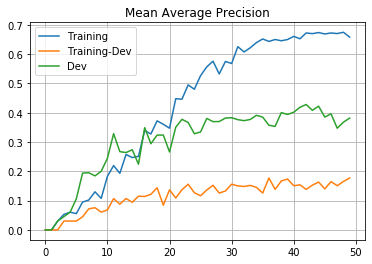

In [0]:
""" Visualizing Training Results """
################################################################################
# As the disucssion in this checkpoint based on the results obtained during    #
# preparation of this notebook, it is NOT advised to execute the code cells    #
# before you have studied the entire notebook once.                            #
#                                                                              #
# After studying all the discussions in this notebook, and would you like to   #
# take experiments, please feel free to modify the following codes. But please #
# remind that the code execution results will be refreshed.                    #
################################################################################

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
plt.title("Mean Average Precision")

ax.plot(train_mean_aps, label='Training')
ax.plot(train_dev_mean_aps, label='Training-Dev')
ax.plot(dev_mean_aps, label='Dev')

plt.grid()
plt.legend()
plt.show()

and she samples some images from training set and visualize model predictions (bounding boxes) on those images:

(or see [["./figures/pred_1.png"](./figures/pred_1.png), ["./figures/pred_2.png"](./figures/pred_2.png), ["./figures/pred_3.png"](./figures/pred_3.png), ["./figures/pred_4.png"](./figures/pred_4.png), ["./figures/pred_5.png"](./figures/pred_5.png))

Ground-truth Bounding Boxes:


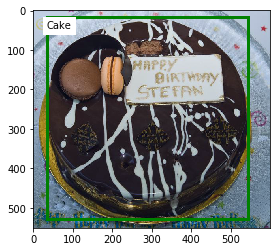

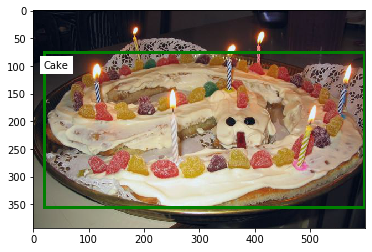

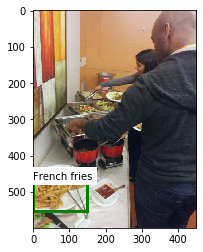

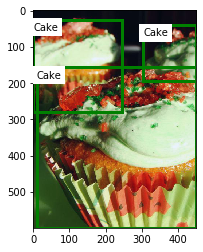

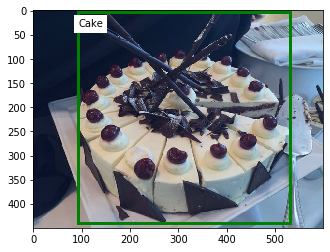

-----
Predicted Bounding Boxes:


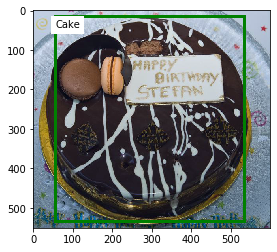

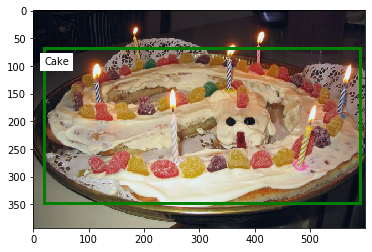

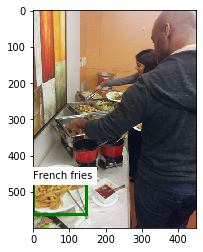

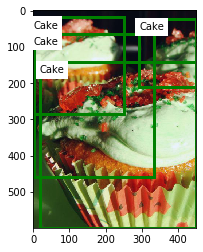

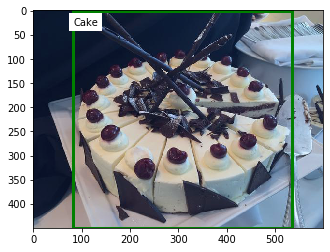

-----


In [0]:
""" Visualize Predictions """
################################################################################
# As the disucssion in this checkpoint based on the results obtained during    #
# preparation of this notebook, it is NOT advised to execute the code cells    #
# before you have studied the entire notebook once.                            #
#                                                                              #
# After studying all the discussions in this notebook, and would you like to   #
# take experiments, please feel free to modify the following codes. But please #
# remind that the code execution results will be refreshed.                    #
################################################################################

# Some utility functions are prepared in "utils_vis.py", and you may check the
# comments inside for explanations of how images and bounding boxes are visualized.
from utils_vis import display_image_batch_with_bbox

# Take some images from Training Set
images, targets = next(iter(train_loader))
# Pass data tensors to 'device'
images = [ t.to(device) for t in images ]
targets = [ {'boxes':d['boxes'].to(device), 'labels':d['labels'].to(device)} 
              for d in targets ]

# Give prediction
model.eval()
with torch.no_grad():
    outputs = model(images)

# Visualize ground-truths and predictions
print("Ground-truth Bounding Boxes:")
display_image_batch_with_bbox(images, targets, LABEL_CAT_DICT)
print("-----")
print("Predicted Bounding Boxes:")
display_image_batch_with_bbox(images, outputs, LABEL_CAT_DICT)
print("-----")

Alice is pleased by the experiment results, because mAP=0.658 (considering that the state-of-the-art mAP=0.73 is achieved with much much much larger dataset and more complex model) on the Training Set is achieved, and the predicted bounding boxes seem to capture objects well in the visualizations. Also, Alice finds that the model has converged since the curve of training scores goes flat near the end of training phase, so she believes there is no need to keep training the model. Alice then deploys this model and put her application into practice.

## Your Task

Although Alice has constructed her model and analysed performance of her model, she was not doing everything appropriately. Your task is to point out __two issues of Alice’s work__. You may consider her choices of data, model configuration, experimental procedures, performance analysis, or other matters that you found Alice is not handling well. (Hint: think along the lines of issues discussed in Modules 2 and 3.) For each of the issues, you will need to explain how the issue is reflected from Alice’s works, and suggest __one reasonable way to fix the issue__.  It is __not necessary__ for you to implement your fixes, but try your best to include some experimental results (wherever appropriate) as evidences to support your suggestions.


[Issue 1 & Fix 1]
Issue 1 is that there is a huge variance. The Mean Average Precision of Training in last Epoch is 0.658 while the mAP of Training-Dev is 0.177. There is around 0.5 difference in accuracy. From the graph plotted above, we can see a huge difference in the mAP line of Training and Training-Dev across epochs. In other words, the difference between Training-Dev Error and Training Error is huge and the variance is large. So, it is overfitting to Training Set.

To fix it, we can use Data Augmentation to increase diversity of dataset. We can rotate each image in our dataset for multiples of 90 degrees, and we will then obtain 3 times more different image samples. We can also make images dimmer or brighter to get more image samples. By doing so, the size of Training Set and Training-Dev Set can be increased. Data Augmentation can reduce the chance of overfitting and thus improve model performance.


[Issue 2 & Fix 2]
Issue 2 is that there is data mismatch. The difference of data distributions between training data and test data is huge. From the graph, we see observe a huge gap in between the mAP line of Training-Dev and Dev. In the last Epoch, the mAP of Training-Dev is 0.177 while the mAP of Dev is 0.382. There is around 0.2 difference in accuracy. In other words, the difference between Training-Dev Error and Dev Error is huge.

To fix it, we can enrich Training Data to reduce the difference of data distributions. In the Training set, around 73% of images are from xclick and 26% are from activemil (counted in excel). However, all images in the Test Set are from xclick. The distribution is different, and we can increase the percentage of xclick images in the Training Set so as to make the distribution similar to Test Set. We can try to take some test data for training so as to train our model with data drawn from distribution of test data. Also, we can reduce the number of activemil images in Train Set or add more images from xclick in Train Set.


-----

<a id=’s6’></a>
# 6 Submission

To complete this assignment, you will need to provide your discussions on the suggested issues and improvements. You may prepare your works in this notebook, or in a separate file.

If you are preparing your answers in this Jupyter notebook, please feel free to add any code cells to write your codes, or any text cells for giving explanations. However, __any modification to existing codes will not be examined__. If you would like to modify provided codes or to prepare new experiment results, please add new code cells at the end of this notebook, and provide enough instruction.

You may also prepare your answers in a separate document, for example, giving your discussions on your methods or any visualization to assist your illustration.  

In either way, please keep your presentation clear and comprehensible.

----- 
